# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice.
umice = merge["Mouse ID"].nunique()
umice_string = str(umice)
count = merge.count()
pucount = "The number of unique mice is: "+ umice_string + "\n" + "\n"+"The total counts are:" + " \n" + "\n"
print(pucount, count)





The number of unique mice is: 249

The total counts are: 

 Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dups = merge[merge.duplicated()]
dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
merge.loc[merge["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merge[merge["Mouse ID"] != "g989"]
clean.head()





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice in the clean DataFrame.
umice = clean["Mouse ID"].nunique()
umice_string = str(umice)
count = clean.count()
pucount = "The number of unique mice is: "+ umice_string + "\n" + "\n"+"The total counts are:" + " \n" + "\n"
print(pucount, count)

The number of unique mice is: 248

The total counts are: 

 Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64


## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_mean = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_variance = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_std = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                                "Median Tumor Volume": drug_median,
                                "Tumor Volume Variance": drug_variance,
                                 "Tumor Volume Std. Dev.": drug_std,
                                 "Tumor Volume Std. Err.": drug_sem,})
drug_summary




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

agg_summary = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
agg_summary


# Using the aggregation method, produce the same summary statistics in a single line.


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

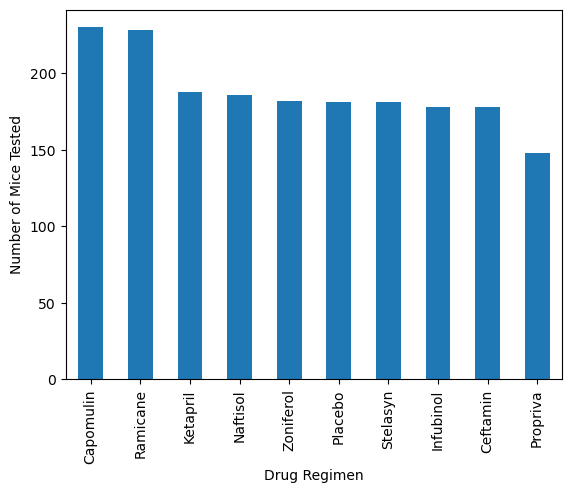

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_and_drug = clean["Drug Regimen"].value_counts()
time_and_drug.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested", legend=False)





In [36]:

#Determine total mice by drug
mouse_count_by_drug_s = clean["Drug Regimen"].value_counts()
mouse_count_by_drug_s


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

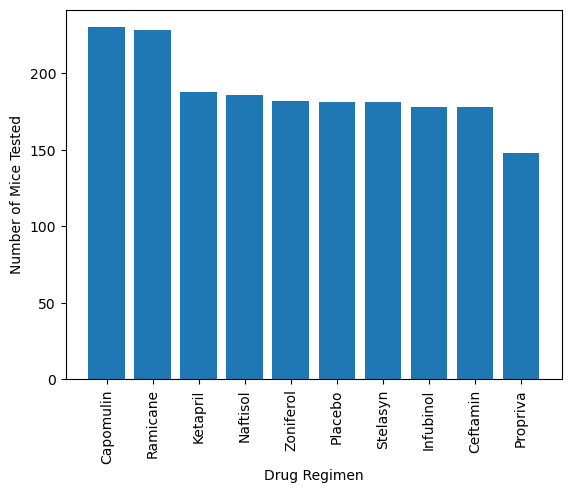

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(mouse_count_by_drug_s.index, mouse_count_by_drug_s.values, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()







<Axes: >

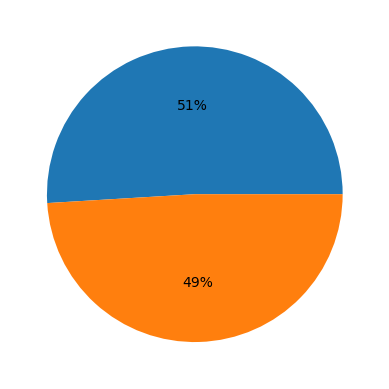

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male = len(clean[clean["Sex"]=="Male"])
female = len(clean[clean["Sex"]=="Female"])

pie_sex = pd.DataFrame({"Sex": ["Male", "Female"], "Count": [male, female]})
pie_sex.plot(kind='pie', y="Count", autopct="%1.0f%%", legend=None, labels=None, ylabel="")


(-1.0999999966554264,
 1.0999999297639522,
 -1.0999999100756186,
 1.0999999844482926)

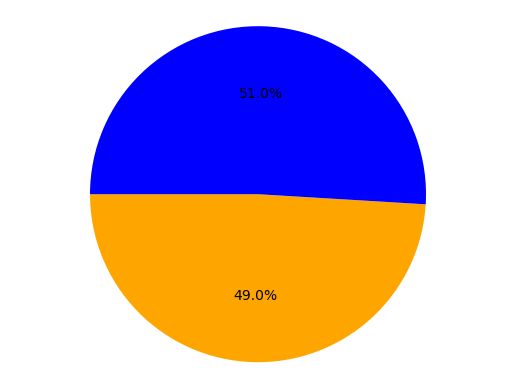

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = len(clean[clean["Sex"]=="Male"])
female = len(clean[clean["Sex"]=="Female"])

sizes = [female, male]
colors = ["orange", "blue"]
plt.pie(sizes, colors=colors,
         autopct="%1.1f%%", shadow=False, startangle=180)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean.groupby("Mouse ID")["Timepoint"].max()
max_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

time_merged = pd.merge(max_time, clean, on=["Mouse ID", "Timepoint"])
time_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)

#list for drug names
best_drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#loop through each drug in the list , locating the rows in the merged df that correspond to each treatment
#append the resulting final tumor volumes for each drug in the empty list

time_merged["Tumor Volume (mm3)"] 
for drug in best_drug_names:
    drug_filter_s = time_merged["Drug Regimen"] == drug
    tumor_vol_data.append(drug_filter_s)
    drug_df = time_merged[drug_filter_s]
    drug_df["Tumor Volume (mm3)"].values
    values = time_merged.loc[drug_filter_s, "Tumor Volume (mm3)"]
    if drug == "Capomulin":
        capomulin_values = values
    elif drug == "Ramicane":
        ramicane_values = values
    elif drug == "Infubinol":
        infubinol_values = values
    elif drug == "Ceftamin":
        ceftamin_values = values

#Determine outliers by using the upper and lower bounds, and then print the results.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


quartiles = capomulin_values.quantile([.25,.5,.75])
# values
lowq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = lowq - upperq
#quartiles
print("The lower bounds for Capomulin is: ", lowq)
print("The upper bounds for Capomulin is: ", upperq)
print("The interquartile range for Capomulin is: ", iqr)

quartiles = ramicane_values.quantile([.25,.5,.75])
# values
lowq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = lowq - upperq
# # #quartiles
print("\n" + "The lower bounds for Ramicane is: ", lowq)
print("The upper bounds for Ramicane is: ", upperq)
print("The interquartile range for Ramicane is: ", iqr)

quartiles = infubinol_values.quantile([.25,.5,.75])
# values
lowq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = lowq - upperq
# # #quartiles
print("\n" + "The lower bounds for Infubinol is: ", lowq)
print("The upper bounds for Infubinol is: ", upperq)
print("The interquartile range for Infubinol is: ", iqr)

quartiles = ceftamin_values.quantile([.25,.5,.75])
# values
lowq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = lowq - upperq
# # #quartiles
print("\n" + "The lower bounds for Ceftaminl is: ", lowq)
print("The upper bounds for Ceftamin is: ", upperq)
print("The interquartile range for Ceftamin is: ", iqr)


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower bounds for Capomulin is:  32.37735684
The upper bounds for Capomulin is:  40.1592203
The interquartile range for Capomulin is:  -7.781863460000004

The lower bounds for Ramicane is:  31.56046955
The upper bounds for Ramicane is:  40.65900627
The interquartile range for Ramicane is:  -9.098536719999998

The lower bounds for Infubinol is:  54.04860769
The upper bounds for Infubinol is:  65.52574285
The interquartile range for Infubinol is:  -11.477135160000003

The lower bounds for Ceftaminl is:  48.72207785
The upper bounds for Ceftamin is:  64.29983003
The interquartile range for Ceftamin is:  -15.577752179999997


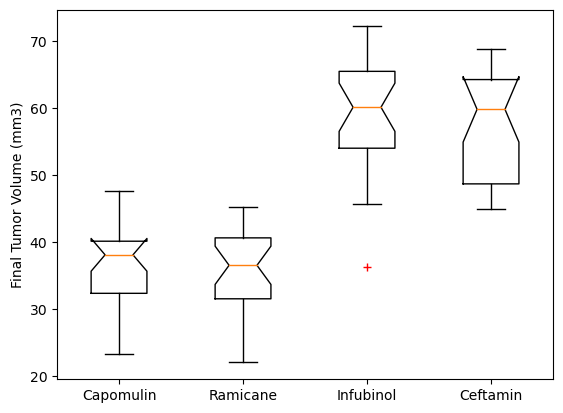

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capomulin_values, ramicane_values, infubinol_values, ceftamin_values], "Symbol", 'r+', labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]) 
plt.show()


## Line and Scatter Plots

In [45]:
capomulin_values

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [46]:
#Timepoint values in list
testing = clean[clean["Mouse ID"] == "b128"]
testing
b128_timepoints = testing["Timepoint"].values
b128_timepoints



array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.plot(b128_timepoints, capomulin_values)
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

